<a href="https://colab.research.google.com/github/krishnamhn009/datascience/blob/master/Car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Acceptability 

In [238]:
#import necessary libraries
# Bits ML group 310
#1. Krishna M Digvijai
#2. SabyaSachi Shadangi
#3. Vishal Gupta

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 #%matplotlib inline

In [239]:
#read the data from file
filename='car.data'
carDataFrame = pd.read_csv(filename)
carDataFrame.columns = ['buying', "maint", 'doors', 'persons', 'lug_boot', 'safety', 'Condition']
print (carDataFrame.head(15))

   buying  maint doors persons lug_boot safety Condition
0   vhigh  vhigh     2       2    small    med     unacc
1   vhigh  vhigh     2       2    small   high     unacc
2   vhigh  vhigh     2       2      med    low     unacc
3   vhigh  vhigh     2       2      med    med     unacc
4   vhigh  vhigh     2       2      med   high     unacc
5   vhigh  vhigh     2       2      big    low     unacc
6   vhigh  vhigh     2       2      big    med     unacc
7   vhigh  vhigh     2       2      big   high     unacc
8   vhigh  vhigh     2       4    small    low     unacc
9   vhigh  vhigh     2       4    small    med     unacc
10  vhigh  vhigh     2       4    small   high     unacc
11  vhigh  vhigh     2       4      med    low     unacc
12  vhigh  vhigh     2       4      med    med     unacc
13  vhigh  vhigh     2       4      med   high     unacc
14  vhigh  vhigh     2       4      big    low     unacc


In [240]:
#check for null values
carDataFrame.isnull().sum()


buying       0
maint        0
doors        0
persons      0
lug_boot     0
safety       0
Condition    0
dtype: int64

In [241]:
#summary
carDataFrame.describe()

carDataFrame.head()



,buying,maint,doors,persons,lug_boot,safety,Condition
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [242]:
#info of the dataset
carDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1727 non-null   object
 1   maint      1727 non-null   object
 2   doors      1727 non-null   object
 3   persons    1727 non-null   object
 4   lug_boot   1727 non-null   object
 5   safety     1727 non-null   object
 6   Condition  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


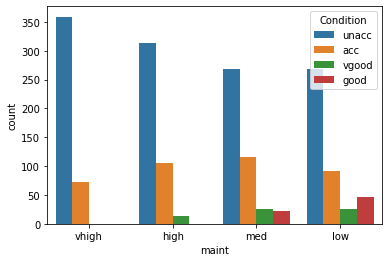

In [243]:
#plotting distribution of attributes
maint = sns.countplot(x="maint",hue="Condition",  data=carDataFrame)

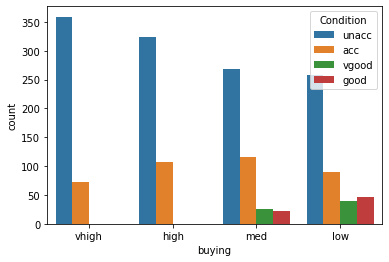

In [244]:
##plotting distribution of attributes
buying = sns.countplot(x="buying",hue="Condition",  data=carDataFrame)

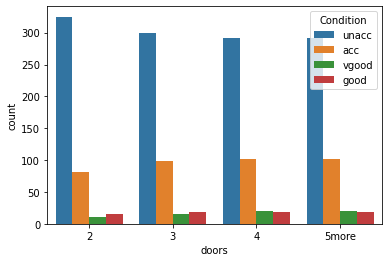

In [245]:
#plotting distribution of attributes
doors = sns.countplot(x="doors",hue="Condition",  data=carDataFrame)

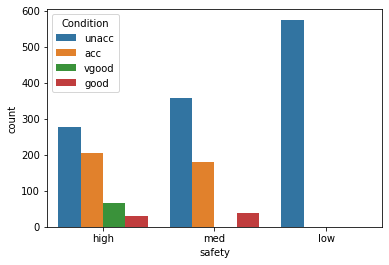

In [246]:
#plotting distribution of attributes
safety = sns.countplot(x="safety",hue="Condition",  data=carDataFrame, order=['high', 'med', 'low'])

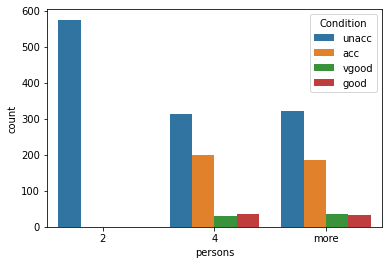

In [247]:
#plotting distribution of attributes
passengers = sns.countplot(x="persons",hue="Condition",  data=carDataFrame)

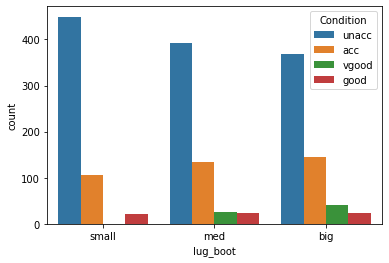

In [248]:
#plotting distribution of attributes
lug_boot = sns.countplot(x="lug_boot",hue="Condition",  data=carDataFrame)

In [249]:
#converting categorical variables into numerical variables
carDataFrame['buying'] = carDataFrame['buying'].map({'low': 1, 'med': 2, 'high' : 3, 'vhigh': 4})
carDataFrame['maint'] = carDataFrame['maint'].map({'low': 1, 'med': 2, 'high' : 3, 'vhigh': 4})
carDataFrame['safety'] = carDataFrame['safety'].map({'low': 1, 'med': 2, 'high' : 3})
carDataFrame['lug_boot'] = carDataFrame['lug_boot'].map({'small': 1, 'med': 2, 'big' : 3})
carDataFrame['persons'] = carDataFrame['persons'].map({'2': 2, '4' : 4, 'more' : 5})
carDataFrame['doors'] = carDataFrame['doors'].map({'2': 2, '3':3, '4':4, '5more' : 5})
carDataFrame['Condition'] = carDataFrame['Condition'].map({'unacc': 1, 'acc': 2, 'good' : 3, 'vgood': 4})

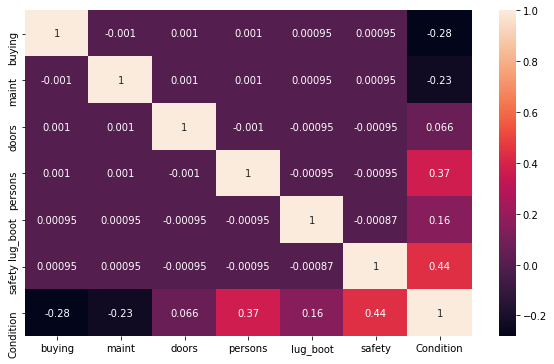

In [250]:
#Correlation map to see how features are correlated
fig=plt.figure(figsize=(10,6))
sns.heatmap(carDataFrame.corr(),annot=True)

In [251]:
#dividing dataset into X and y
X=carDataFrame[carDataFrame.columns[:-1]]
y=carDataFrame['Condition']
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

In [252]:
#splitting dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [253]:
#import necessary libraries for Logistic Regression, Cross Validation, and Model Selection
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
model=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=10,n_jobs=-1)

In [254]:
model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [255]:
print(model.best_params_)
print(model.best_score_)

{'C': 10, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.8460674931129477


In [256]:
pred = model.predict(X_test)

In [257]:
#predicting for following attributes : buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med]
new_prediction = model.predict(np.array([[4, 1, 4, 5,1,2]]))
new_prediction

array([1])

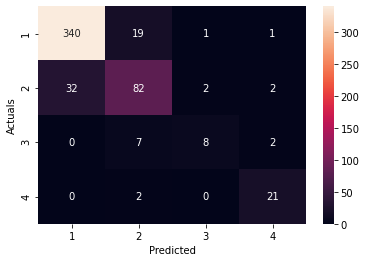

In [258]:
## Confusion Matrix
cm_ = confusion_matrix(y_test, pred)

LABELS = ['1', '2', '3', '4']
sns.heatmap(cm_, annot=True, xticklabels=LABELS, yticklabels=LABELS, fmt='g')
xl = plt.xlabel("Predicted")
yl = plt.ylabel("Actuals")

In [259]:
from matplotlib.colors import ListedColormap
h = 0.01 # step size in the mesh
x = 1

x1_min, x1_max = X_train.values[:, 0].min() - x, X_train.values[:, 0].max() + x
y1_min, y1_max = X_train.values[:, 1].min() - x, X_train.values[:, 1].max() + x

xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(y1_min, y1_max, h))

In [260]:
LR = LogisticRegression()
LR.fit(X_train.values[:, :2], y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier ins

IndexError: ignored

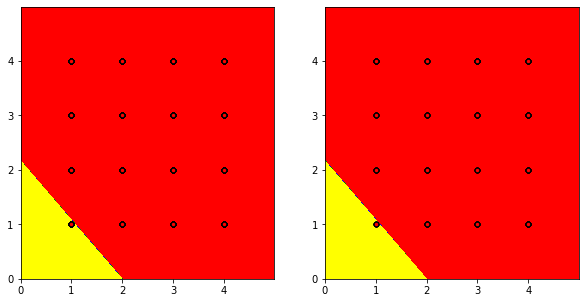

In [261]:
plot_decisionboundary(LR, xx1, yy1)